# CNN for AED with Keras/TensorFlow

Date: February 29, 2019

Neural network: input MFSCs to CNN

## Preparing data set for CNN

In [3]:
DATASET_FOLDER = '../dataset/data_environment'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=False)
shape = ds.shape
class_labels = ds.class_labels

((490, 64, 40, 1), (210, 64, 40, 1))

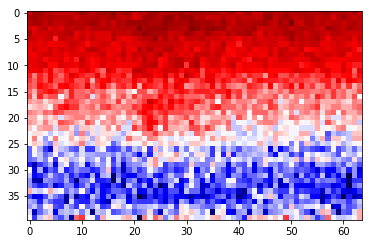

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)), cmap='seismic')
train_data.shape, test_data.shape

### CNN model

In [5]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 38, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 19, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 17, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 8, 8)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 6, 16)         1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
__________

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

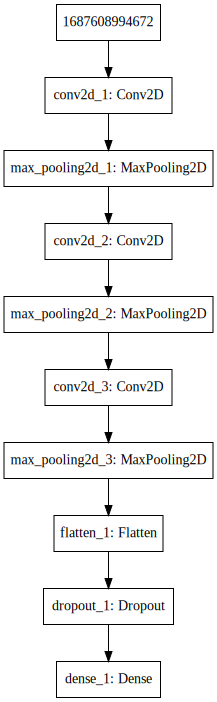

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [8]:
EPOCHS = 40
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 490 samples, validate on 210 samples
Epoch 1/40
490/490 [==============================] - 4s 7ms/step - loss: 1.7478 - acc: 0.3143 - val_loss: 1.5109 - val_acc: 0.5048
Epoch 2/40
490/490 [==============================] - 3s 6ms/step - loss: 1.4141 - acc: 0.4612 - val_loss: 1.1570 - val_acc: 0.6095
Epoch 3/40
490/490 [==============================] - 3s 6ms/step - loss: 1.1565 - acc: 0.5490 - val_loss: 0.9467 - val_acc: 0.6524
Epoch 4/40
490/490 [==============================] - 3s 6ms/step - loss: 1.0325 - acc: 0.5959 - val_loss: 0.8514 - val_acc: 0.6810
Epoch 5/40
490/490 [==============================] - 3s 6ms/step - loss: 0.8865 - acc: 0.6367 - val_loss: 0.7402 - val_acc: 0.7286
Epoch 6/40
490/490 [==============================] - 3s 6ms/step - loss: 0.8602 - acc: 0.6327 - val_loss: 0.6933 - val_acc: 0.7619
Epoch 7/40
490/490 [==============================] - 3s 6ms/step - loss: 0.7799 - acc: 0.6878 - val_loss: 0.6264 - val_acc: 0.7762
Epoch 8/40
490/490 [==========

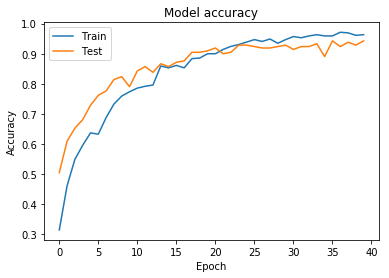

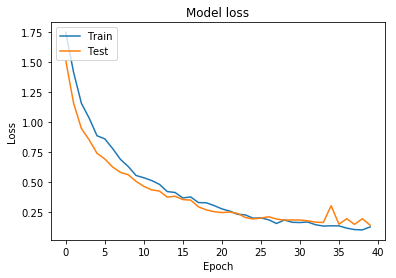

In [9]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [18]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/cnn_for_aed_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [19]:
del model
model = models.load_model(filename)

## Confirmation

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [14]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [15]:
class_labels

['silence', 'train', 'station', 'cafe', 'mall', 'port', 'street']

In [16]:
(activations[-1][:10]*100).astype(int)

array([[ 0,  0,  0,  0,  0,  0, 99],
       [ 0,  0,  0,  0,  0,  0, 99],
       [ 0,  0,  1, 98,  0,  0,  0],
       [99,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 99,  0,  0],
       [ 0, 75,  0,  0, 24,  0,  0],
       [ 0,  0,  0,  0,  0, 99,  0],
       [ 0,  0,  0,  0,  0,  0, 99],
       [99,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 23, 76]])

In [17]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1]])